# 1. Create a DataFrame by reading in the 2019_Yellow_Taxi_Trip_Data.csv file:

In [1]:
import pandas as pd 
taxi = pd.read_csv('/Users/yiningqu/Desktop/data/2019_Yellow_Taxi_Trip_Data.csv')

# 2. Find the dimensions (number of rows and number of columns) in the data:

In [2]:
taxi.shape

(10000, 18)

# 3. Calculate summary statistics for the fare_amount , tip_amount , tolls_amount , and total_amount columns:

In [3]:
taxi[['fare_amount','tip_amount','tolls_amount','total_amount']].describe

<bound method NDFrame.describe of       fare_amount  tip_amount  tolls_amount  total_amount
0            29.5        7.98          6.12         47.90
1            10.5        0.00          0.00         12.30
2             9.5        2.00          0.00         15.80
3            13.0        4.32          0.00         21.62
4            10.5        0.50          0.00         15.30
...           ...         ...           ...           ...
9995          8.0        2.46          0.00         14.76
9996          8.0        0.00          0.00         12.30
9997          5.0        0.00          0.00          6.80
9998         10.0        0.00          0.00         11.80
9999         19.0        2.50          0.00         25.80

[10000 rows x 4 columns]>

# 4. Isolate the fare_amount , tip_amount , tolls_amount , and total_amount for the longest trip ( trip_distance ):

In [4]:
taxi[taxi['trip_distance'] == max(taxi['trip_distance'])][['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']] 

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


# 1. Read in the meteorite data from the Meteorite_Landings.csv file:

In [5]:
meteorite = pd.read_csv('/Users/yiningqu/Desktop/data/Meteorite_Landings.csv')

# 2. Rename the mass (g) column to mass , and drop all the latitude and longitude columns.

In [6]:
meteorite = meteorite.drop(columns = ['reclat', 'reclong', 'GeoLocation'])
meteorite = meteorite.rename(columns = {'mass (g)' : 'mass'})
meteorite

,name,id,nametype,recclass,mass,fall,year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM
...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM


# 3. Update the year column to only contain the year, and create a new column indicating if the year is unknown. Hint: Use year.str.slice() to grab a substring.

In [7]:
meteorite['year'] = meteorite['year'].str.slice(start=6, stop=10)
meteorite['y'] = meteorite['year'].isnull()
meteorite

,name,id,nametype,recclass,mass,fall,year,y
0,Aachen,1,Valid,L5,21.0,Fell,1880,False
1,Aarhus,2,Valid,H6,720.0,Fell,1951,False
2,Abee,6,Valid,EH4,107000.0,Fell,1952,False
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,False
4,Achiras,370,Valid,L6,780.0,Fell,1902,False
...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,False
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,False
45713,Zlin,30410,Valid,H4,3.3,Found,1939,False
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,False


# 4. There's a data entry error in the year column. Can you find it?

In [8]:
meteorite[meteorite['year'] > '2023']

,name,id,nametype,recclass,mass,fall,year,y
30682,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101,False


# 5. Compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [9]:
meteorite[meteorite['fall'] == 'Fell']['mass'].describe

<bound method NDFrame.describe of 0           21.0
1          720.0
2       107000.0
3         1914.0
4          780.0
          ...   
1106      2900.0
1107       246.0
1108      7500.0
1109       552.0
1110      2568.0
Name: mass, Length: 1107, dtype: float64>

In [10]:
meteorite[meteorite['fall'] == 'Found']['mass'].describe

<bound method NDFrame.describe of 37        256.8
520         9.6
757        69.5
804       290.9
1111      331.0
          ...  
45711     172.0
45712      46.0
45713       3.3
45714    2167.0
45715     200.0
Name: mass, Length: 44609, dtype: float64>

# 6. Create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 1990 to 2000 (inclusive).

In [11]:
new = meteorite[(meteorite['year'] >= '1990') & (meteorite['year'] <= '2000') & (meteorite['fall'] == 'Found')]

df1 = new.groupby('year')['mass'].quantile(0.95)
# pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None)
df1 = df1.reset_index()
df1.columns = ['year', 'q95']

df2 = new.groupby('year')['id'].count()
df2 = df2.reset_index()
df2.columns = ['year', 'amount']

final = pd.merge(df1,df2, on = 'year', how = 'inner')
final

,year,q95,amount
0,1990,596.400,1510
1,1991,1176.900,872
2,1992,1337.800,369
3,1993,220.175,975
4,1994,955.200,713
5,1995,4101.700,481
6,1996,1425.500,578
7,1997,1108.450,1693
8,1998,635.488,2688
9,1999,2018.910,1684


# 7. Using the taxis data from earlier this section, resample the data to an hourly frequency based on the dropoff time. Calculate the total trip_distance , fare_amount , tolls_amount , and tip_amount , then find the 5 hours with the most tips.

In [22]:
new = taxi.copy()
new['tpep_dropoff_datetime'] = pd.to_datetime(new['tpep_dropoff_datetime'])
new.index = new['tpep_dropoff_datetime']
new = new.resample('1H').sum()
new = new[['trip_distance','fare_amount','tolls_amount','tip_amount']]
new

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 07:00:00,0.67,4.50,0.00,0.00
2019-10-23 08:00:00,17.07,62.50,0.00,4.00
2019-10-23 09:00:00,1.58,58.00,0.00,0.00
2019-10-23 10:00:00,0.00,0.00,0.00,0.00
2019-10-23 11:00:00,0.00,0.00,0.00,0.00
2019-10-23 12:00:00,2.49,13.50,0.00,2.20
2019-10-23 13:00:00,6.98,35.50,0.00,4.45
2019-10-23 14:00:00,20.77,90.00,0.00,11.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75


In [25]:
new = new.sort_values(by = 'tip_amount', ascending = False)
new.head(5)

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


# 1. Create box plots of TSA traveler throughput for each year in the data. Hint: Pass kind='box' into the plot() method to generate box plots.

In [66]:
tsa_traveler = pd.read_csv('/Users/yiningqu/Desktop/data/tsa_passenger_throughput.csv')
tsa_traveler

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,5/14/2021,1716561.0,250467,2664549
1,5/13/2021,1743515.0,234928,2611324
2,5/12/2021,1424664.0,176667,2343675
3,5/11/2021,1315493.0,163205,2191387
4,5/10/2021,1657722.0,215645,2512315
...,...,...,...,...
360,5/19/2020,NaN,190477,2312727
361,5/18/2020,NaN,244176,2615691
362,5/17/2020,NaN,253807,2620276
363,5/16/2020,NaN,193340,2091116


<AxesSubplot:>

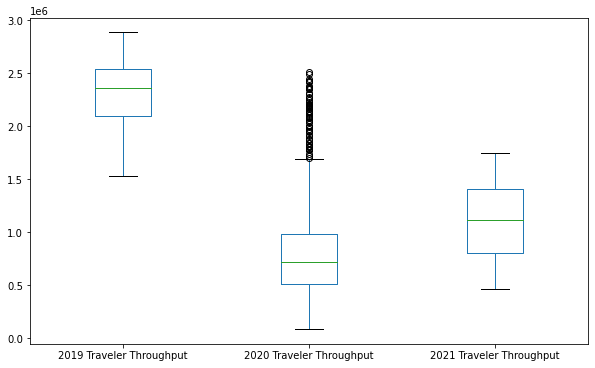

In [70]:
tsa_traveler[['2019 Traveler Throughput', '2020 Traveler Throughput', '2021 Traveler Throughput']].plot(kind='box',figsize=(10,6))

# 2. Using seaborn , create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

<AxesSubplot:xlabel='day of week', ylabel='day of month'>

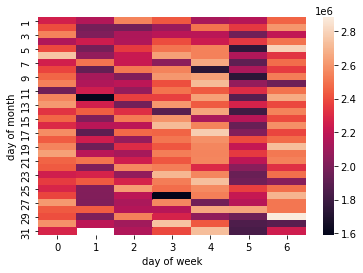

In [73]:
import seaborn as sns
import numpy as np
tsa_traveler['day of week'] = pd.to_datetime(tsa_traveler['Date']).dt.dayofweek
tsa_traveler['day of month'] = pd.to_datetime(tsa_traveler['Date']).dt.day

t2 = tsa_traveler.pivot_table(index='day of month', columns='day of week', values='2019 Traveler Throughput', aggfunc=np.median)
sns.heatmap(t2)



# 3. Annotate the medians in the box plot from #1. Hint: The x coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the Axes.get_xticklabels() method, in which case you should look at the documentation for the Text class.

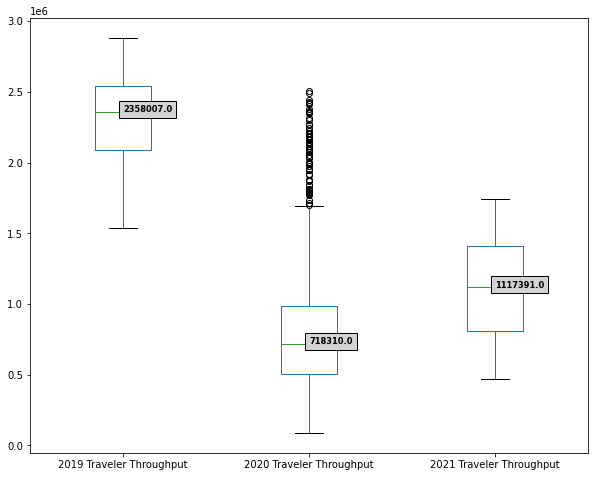

In [74]:
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

t3 = tsa_traveler[['2019 Traveler Throughput', '2020 Traveler Throughput', '2021 Traveler Throughput']]
box_plot = t3.plot(kind='box', figsize=(10, 8))
#plt.xticks(range(1, 4), [1, 2, 3])
t3_stats = [boxplot_stats(t3[col].dropna().values)[0] for col in t3.columns]
stats = pd.DataFrame(t3_stats, index=t3.columns).iloc[:, [8]]

# annotate
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick-1], stats[col][xtick-1], horizontalalignment='left', size='small', color='k', weight='semibold', bbox=dict(facecolor='lightgray'))